In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
pd.set_option('display.max_columns', None)

In [47]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


#### property_type vs price

<Axes: xlabel='property_type', ylabel='price'>

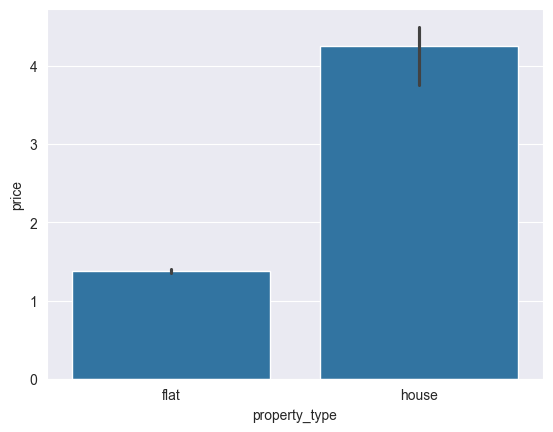

In [48]:
# This plot shows that houses are more costlier and are around 4 crores or range
sns.barplot(x=df['property_type'], y=df['price'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='price'>

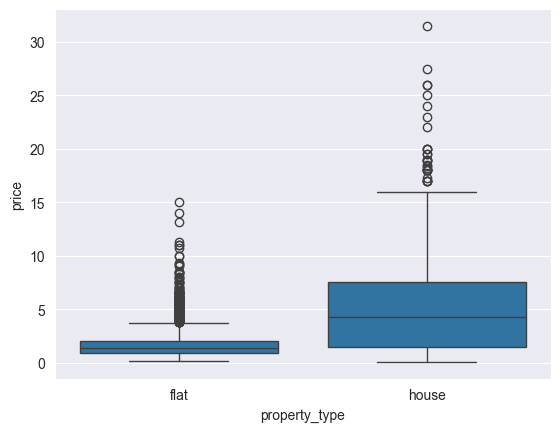

In [49]:
# This graph shows that range of houses lie between 0 to 17, while flats are between 0 to 5
sns.boxplot(x=df['property_type'], y=df['price'])

#### property_type vs area

In [50]:
df.query("property_type == 'house'")['built_up_area'].sample(10)

526     4500.0
1138    3240.0
753     2250.0
1121     800.0
2333    2160.0
1187    1935.0
2420    1665.0
3267    6390.0
3040    3400.0
2470    1426.0
Name: built_up_area, dtype: float64

<Axes: xlabel='property_type', ylabel='built_up_area'>

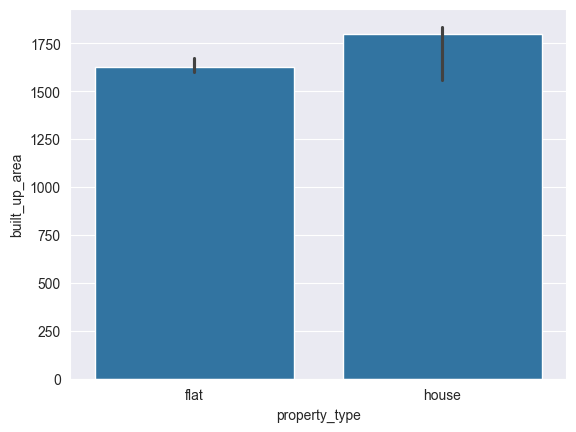

In [51]:
# we get more area in houses than flats
sns.barplot(x=df['property_type'], y=df['built_up_area'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='built_up_area'>

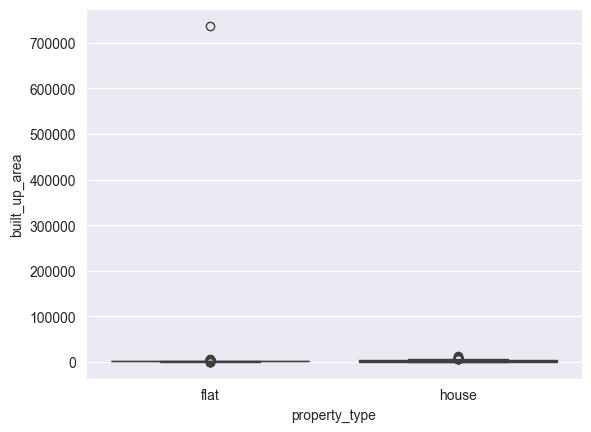

In [52]:
# massive outliers
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

In [65]:
# removing that crazy outlier
df = df[df['built_up_area'] != 737147]

<Axes: xlabel='property_type', ylabel='built_up_area'>

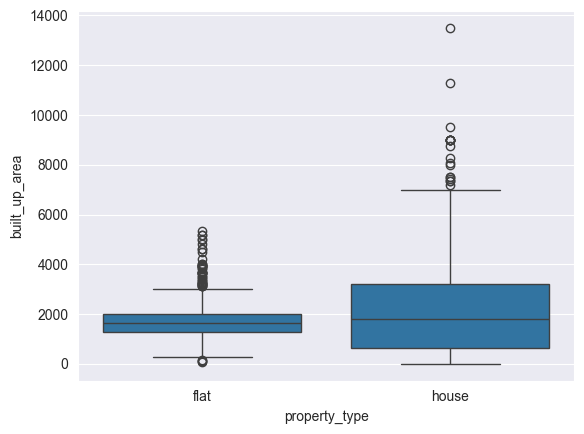

In [66]:
# House have bigger range
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

#### property_type vs price_per_sqft

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

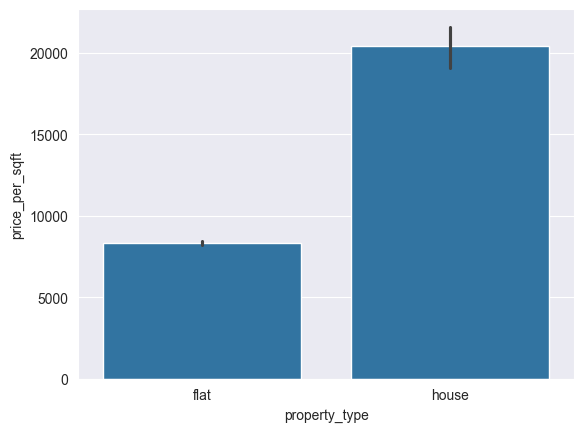

In [69]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

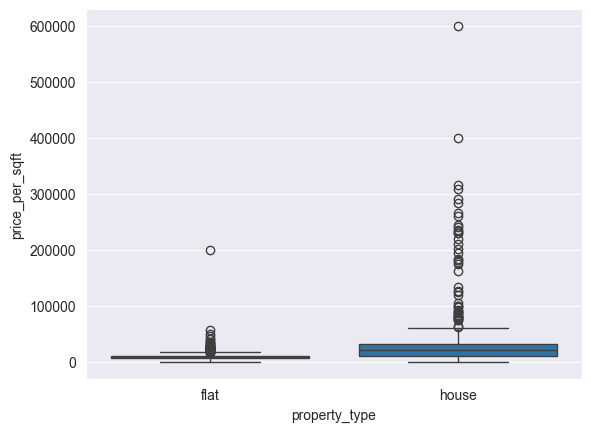

In [70]:
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])

In [71]:
# Checking outliers
df[df['price_per_sqft'] > 100000][
    ['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area', 'areaWithType', 'super_built_up_area',
     'built_up_area', 'carpet_area']]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
229,house,rk excelo,sector 12,0.60,120000.0,50.0,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...,NaN,30.0,15.0
336,house,independent,sector 28,4.50,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),NaN,360.0,NaN
342,house,unitech nirvana birch court,sector 50,7.10,283333.0,251.0,Plot area 240(22.3 sq.m.),NaN,240.0,NaN
545,house,independent,sector 24,10.00,229885.0,435.0,Carpet area: 435 (40.41 sq.m.),NaN,NaN,435.0
867,house,ardee city,sector 52,5.50,183333.0,300.0,Plot area 300(27.87 sq.m.),NaN,300.0,NaN
975,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),NaN,232.0,NaN
1027,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),NaN,270.0,NaN
1062,house,independent,sector 23,2.80,161849.0,173.0,Plot area 173(16.07 sq.m.)Built Up area: 160 s...,NaN,160.0,150.0
1259,house,vipul tatvam villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),NaN,360.0,NaN
1385,house,unitech uniworld resorts,sector 33,9.50,173992.0,546.0,Plot area 546(50.73 sq.m.),NaN,546.0,NaN


Looking at the data we can say the values are wrongly calculated, hence these are data errors and not outliers

<Axes: xlabel='bedRoom', ylabel='property_type'>

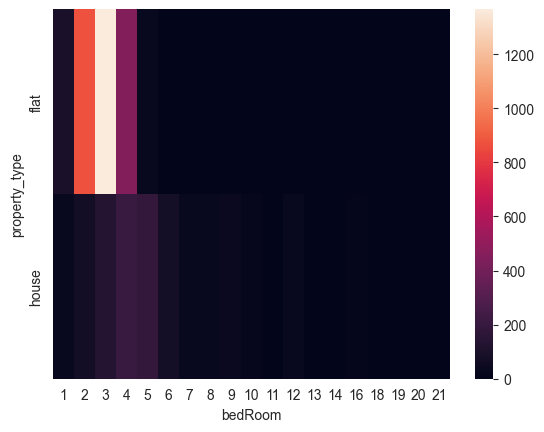

In [72]:
sns.heatmap(pd.crosstab(df['property_type'], df['bedRoom']))

<Axes: xlabel='property_type', ylabel='floorNum'>

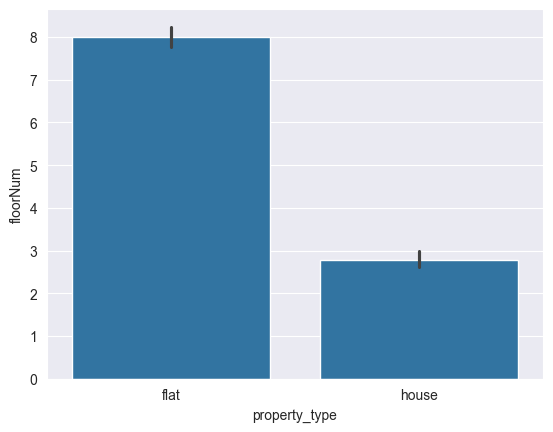

In [73]:
sns.barplot(x=df['property_type'], y=df['floorNum'])

<Axes: xlabel='property_type', ylabel='floorNum'>

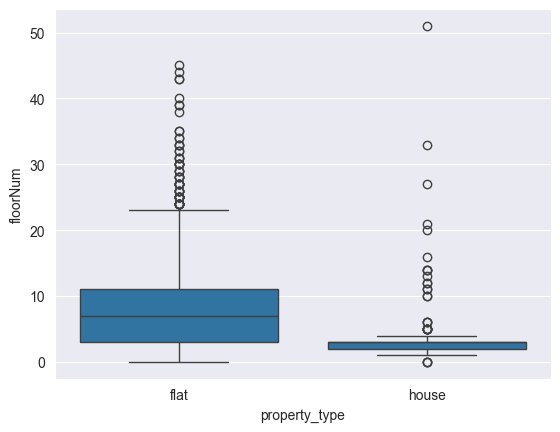

In [74]:
# There is one house with 50th floor
sns.boxplot(x=df['property_type'], y=df['floorNum'])

In [75]:
# Checking for outliers
df[(df['property_type'] == 'house') & (df['floorNum'] > 10)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
35,house,greenopolis,sector 89,0.70,5397.0,1297.0,Built Up area: 1297 (120.5 sq.m.),2,2,2,14.0,North-East,Undefined,NaN,1297.0,NaN,0,0,0,0,0,0,0
106,house,suncity avenue 76,sector 76,0.75,10067.0,745.0,Plot area 745(69.21 sq.m.)Built Up area: 745 s...,2,2,2,11.0,North-East,New Property,NaN,745.0,NaN,0,0,0,0,0,0,40
267,house,ninex city,sector 76,1.75,6250.0,2800.0,Carpet area: 2800 (260.13 sq.m.),4,4,0,14.0,NaN,Undefined,NaN,NaN,2800.0,0,0,0,0,0,0,0
338,house,spaze privy,sector 72,3.09,6981.0,4426.0,Built Up area: 3653 (339.37 sq.m.)Carpet area:...,5,5,3+,14.0,East,Relatively New,NaN,3653.0,2922.0,0,1,0,0,0,1,33
420,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5,5,3+,21.0,NaN,Relatively New,NaN,3653.0,NaN,0,0,0,0,0,0,0
1297,house,indiabulls centrum park,sector 103,3.25,8125.0,4000.0,Plot area 4000(371.61 sq.m.),4,3,3+,20.0,NaN,Under Construction,NaN,4000.0,NaN,0,0,0,0,0,0,51
2147,house,ireo victory valley,sector 67,8.00,22222.0,3600.0,Plot area 400(334.45 sq.m.),6,7,3+,51.0,North-East,Moderately Old,NaN,3600.0,NaN,1,1,0,1,0,1,49
2167,house,suncity township,sector 54,2.00,30968.0,646.0,Plot area 60Built Up area: 60 sq.m.Carpet area...,9,9,3,11.0,North,Relatively New,NaN,60.0,59.0,0,1,0,0,0,2,7
2556,house,dlf the arbour,sector 63,8.50,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,NaN,3950.0,NaN,0,0,0,0,0,0,61
2796,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,13.0,NaN,Undefined,NaN,2360.0,NaN,0,0,0,0,0,0,0


These are houses only but on the top floor of the flats. called as villas

<Axes: xlabel='agePossession', ylabel='property_type'>

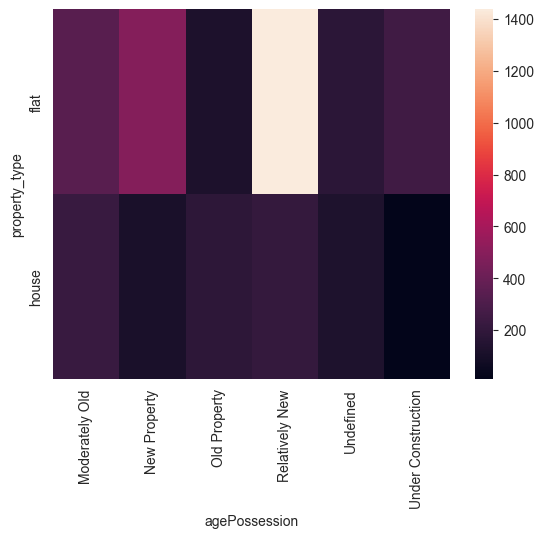

In [76]:
sns.heatmap(pd.crosstab(df['property_type'], df['agePossession']))

Houses are old. Flats are new

<Axes: xlabel='agePossession', ylabel='property_type'>

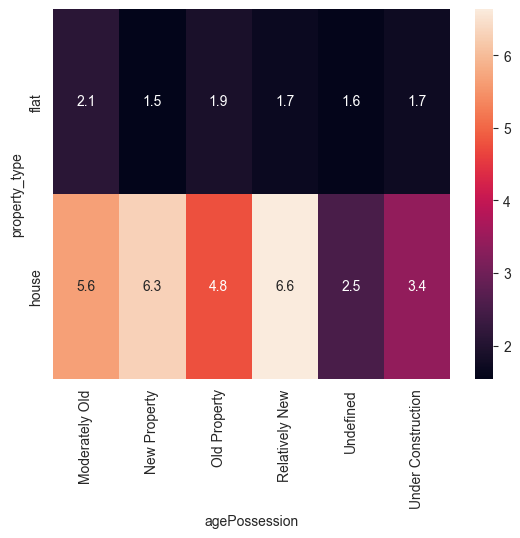

In [77]:
sns.heatmap(pd.pivot_table(df, index='property_type', columns='agePossession', values='price', aggfunc='mean'),
            annot=True)

We can observe that Old houses are at low prices where as new houses are costlier.

On the contrary, old flats are much costlier than new ones 

<Axes: xlabel='bedRoom', ylabel='property_type'>

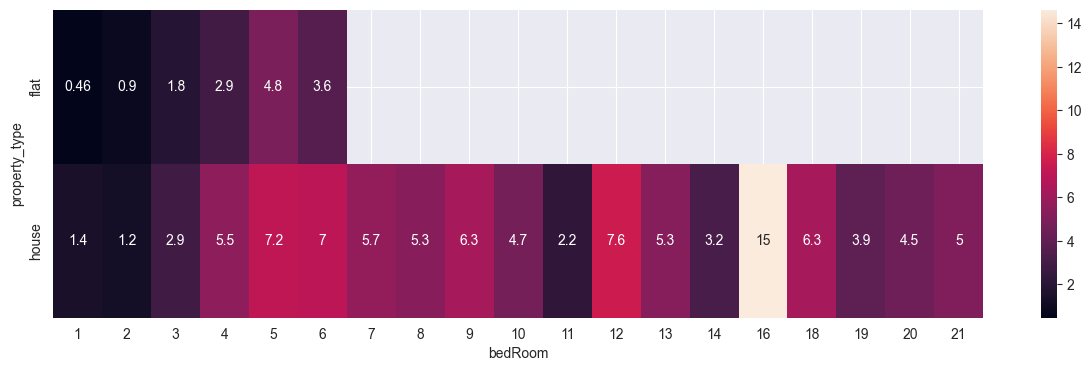

In [78]:
plt.figure(figsize=(15, 4))
sns.heatmap(pd.pivot_table(df, index='property_type', columns='bedRoom', values='price', aggfunc='mean'), annot=True)

Cost is increasing with the increase in no. of bedrooms

<Axes: xlabel='furnishing_type', ylabel='property_type'>

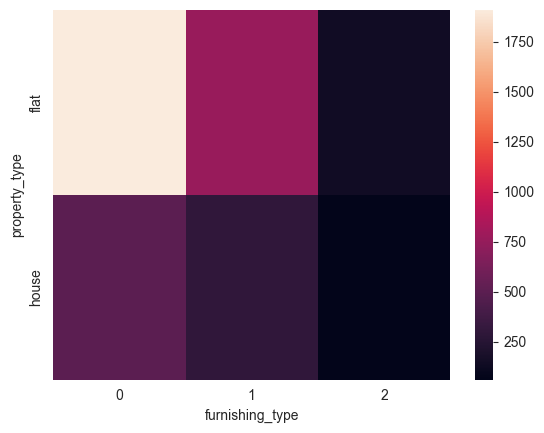

In [79]:
sns.heatmap(pd.crosstab(df['property_type'], df['furnishing_type']))

<Axes: xlabel='furnishing_type', ylabel='property_type'>

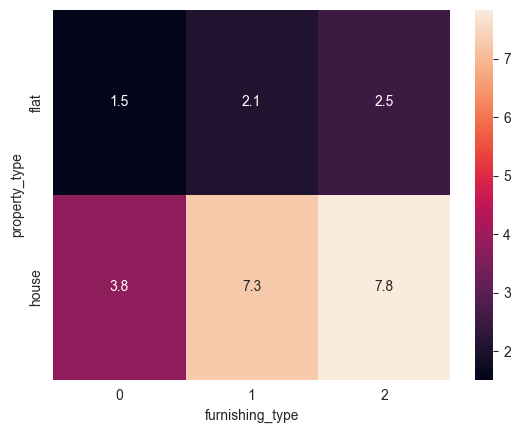

In [80]:
sns.heatmap(pd.pivot_table(df, index='property_type', columns='furnishing_type', values='price', aggfunc='mean'),
            annot=True)

As the furnishing increases the price increases

<Axes: xlabel='property_type', ylabel='luxury_score'>

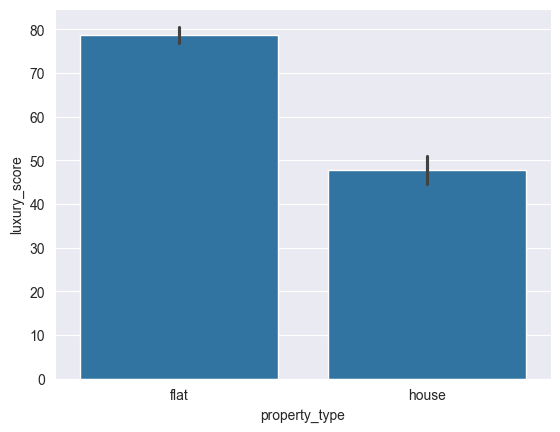

In [81]:
sns.barplot(x=df['property_type'], y=df['luxury_score'])

Flats are more luxurious, like swimming pool etc are more common in flats

<Axes: xlabel='property_type', ylabel='luxury_score'>

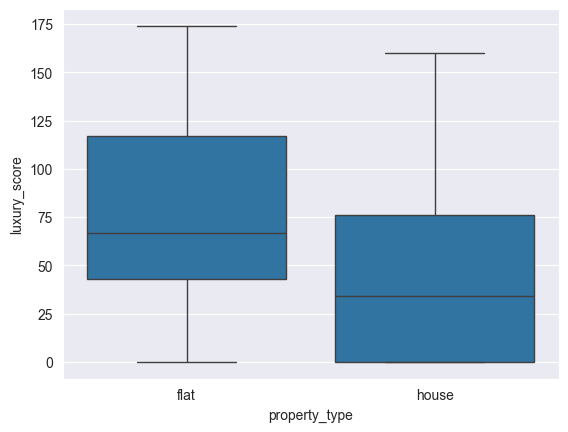

In [82]:
sns.boxplot(x=df['property_type'], y=df['luxury_score'])

<Axes: xlabel='sector', ylabel='property_type'>

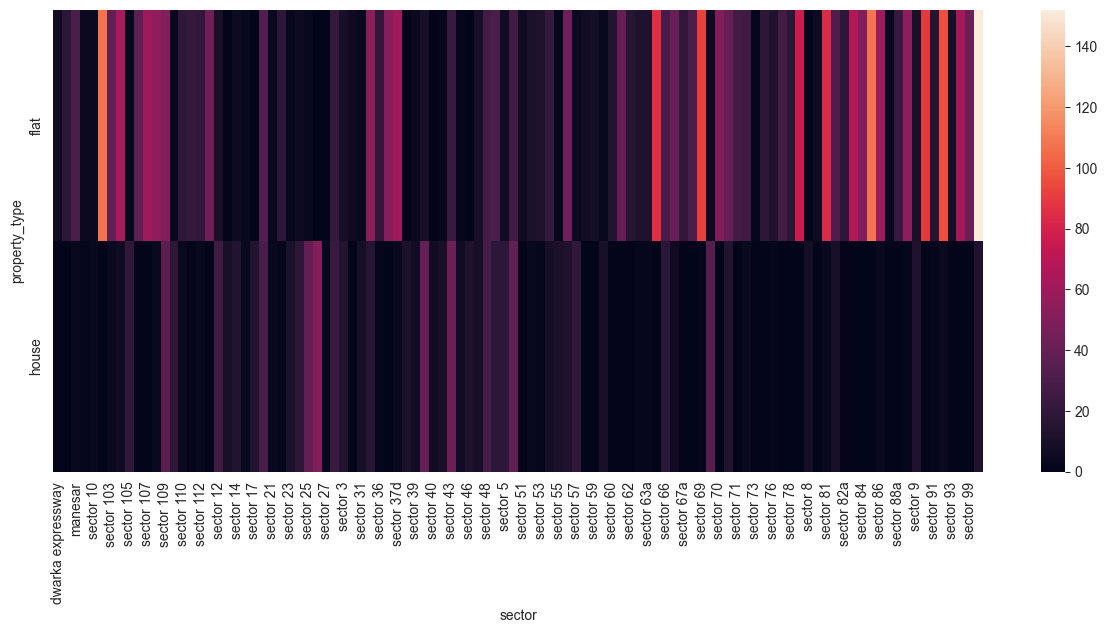

In [83]:
# sector analysis
plt.figure(figsize=(15, 6))
sns.heatmap(pd.crosstab(df['property_type'], df['sector'].sort_index()))

We can notice that sectors after 70 (which are newly made) have more number of flats

Where as older sectors (from 0 to 60) there are more number of houses

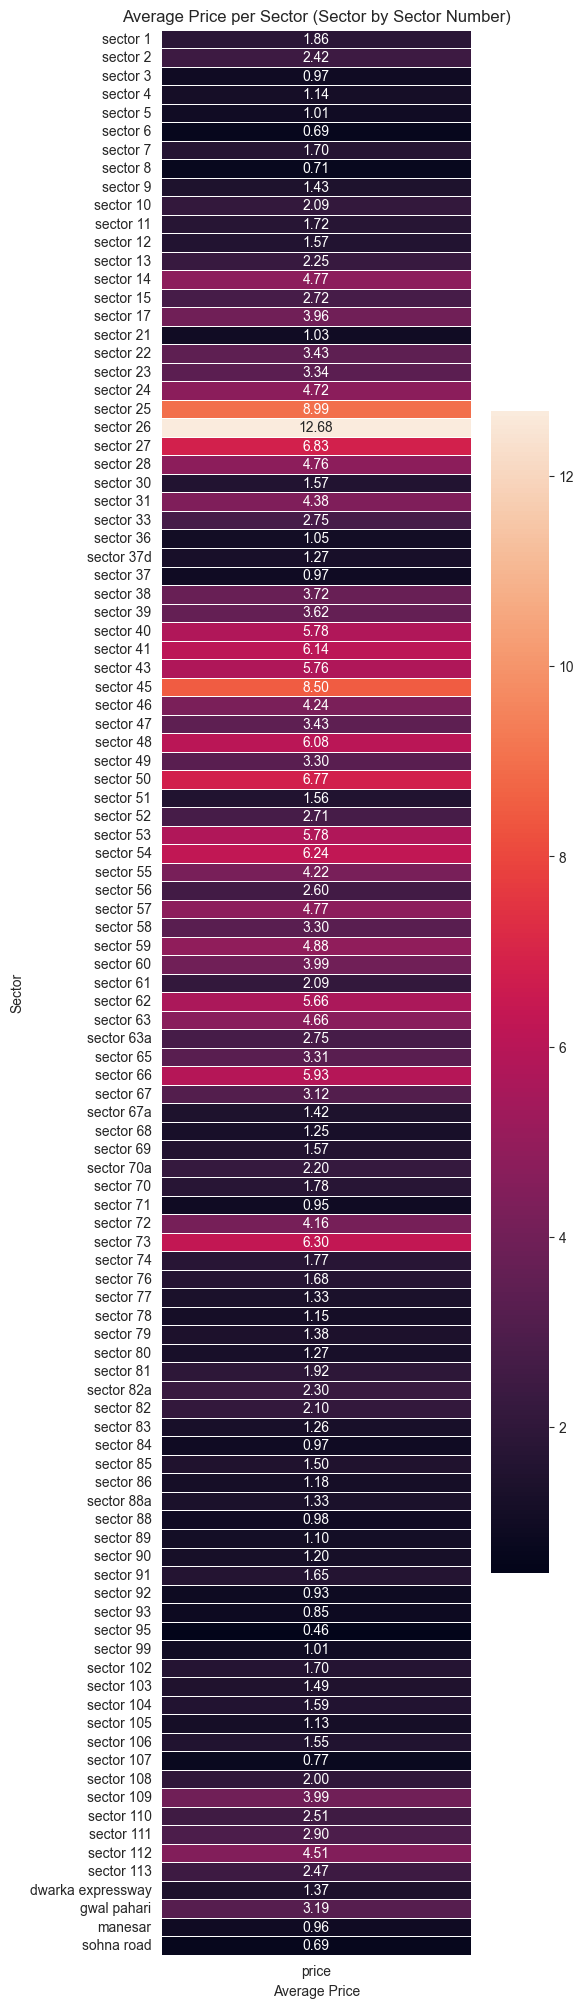

In [85]:
# sector analysis

import re

# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()


# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors


avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sector by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

Sector 1 - 10 Old gurgaon

Sectors 25, 26, 27 belong to DLF, which is the center of Gurgaon

Sector 45 exception

Sector at the end have highways near them, making them slightly costly


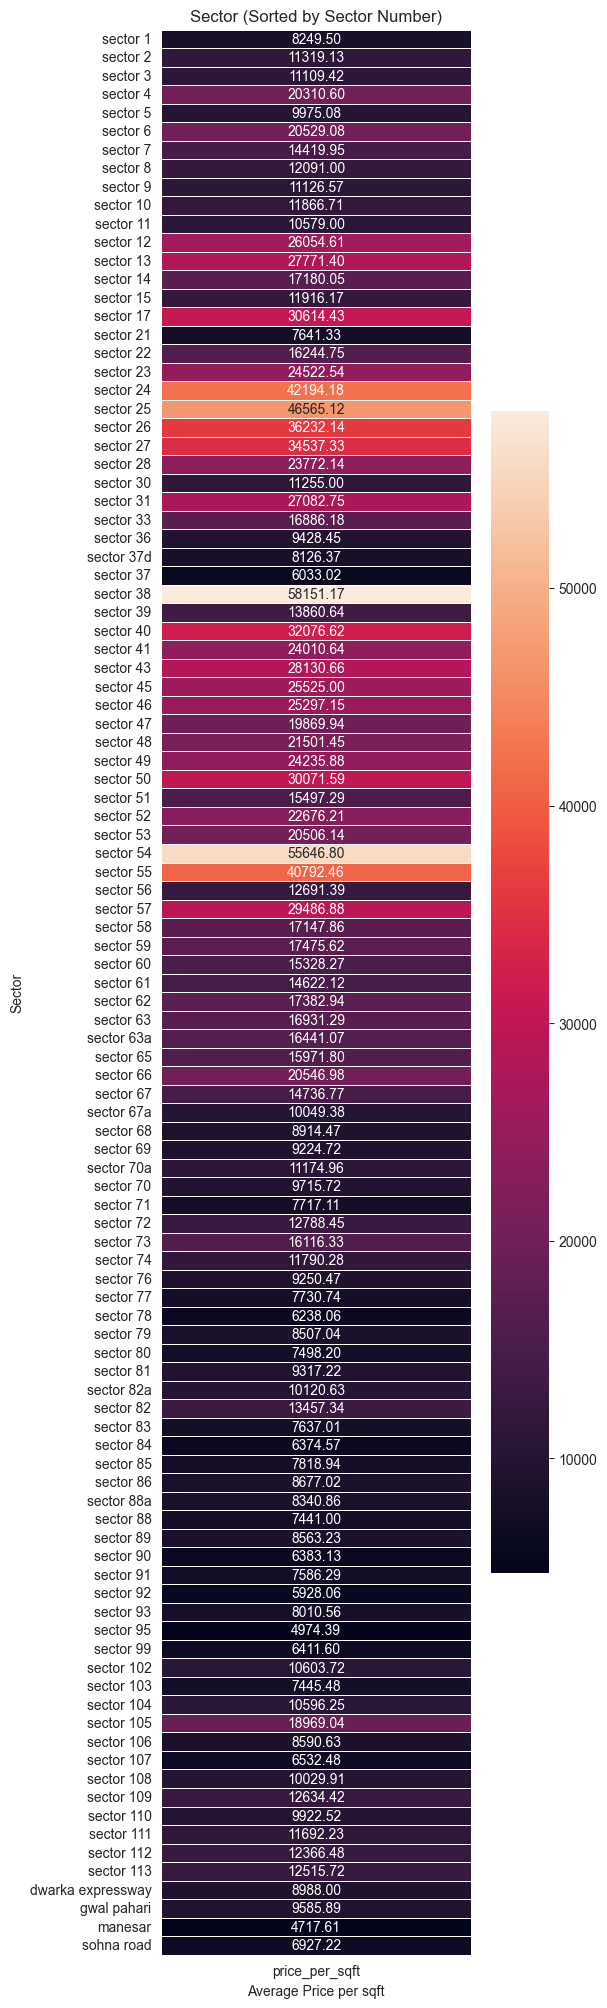

In [86]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f",
            linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

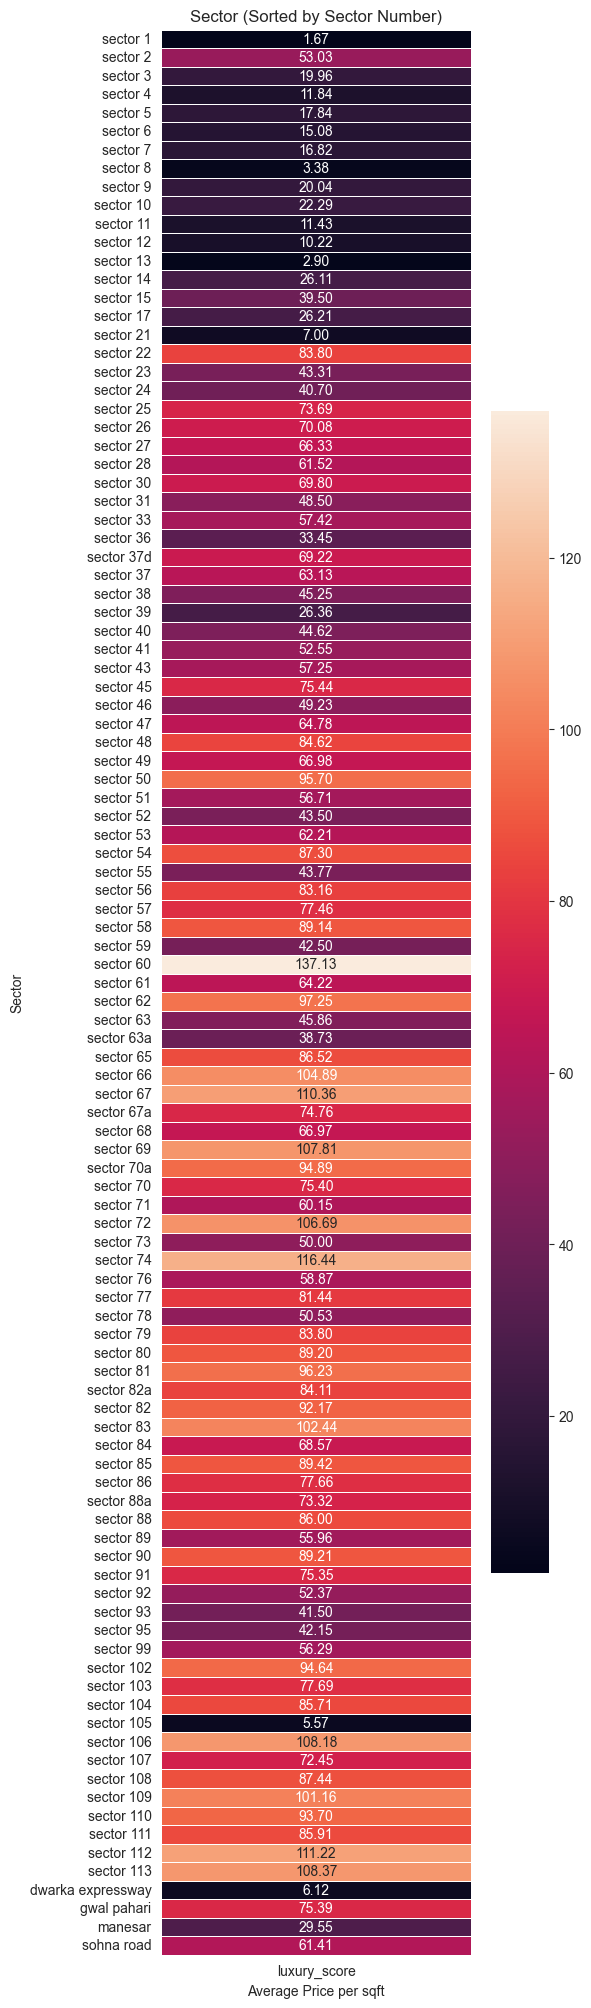

In [87]:
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt='.2f', linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

As we go down where new flats are there so more luxurious flats/houses

#### Price

<Axes: xlabel='area', ylabel='price'>

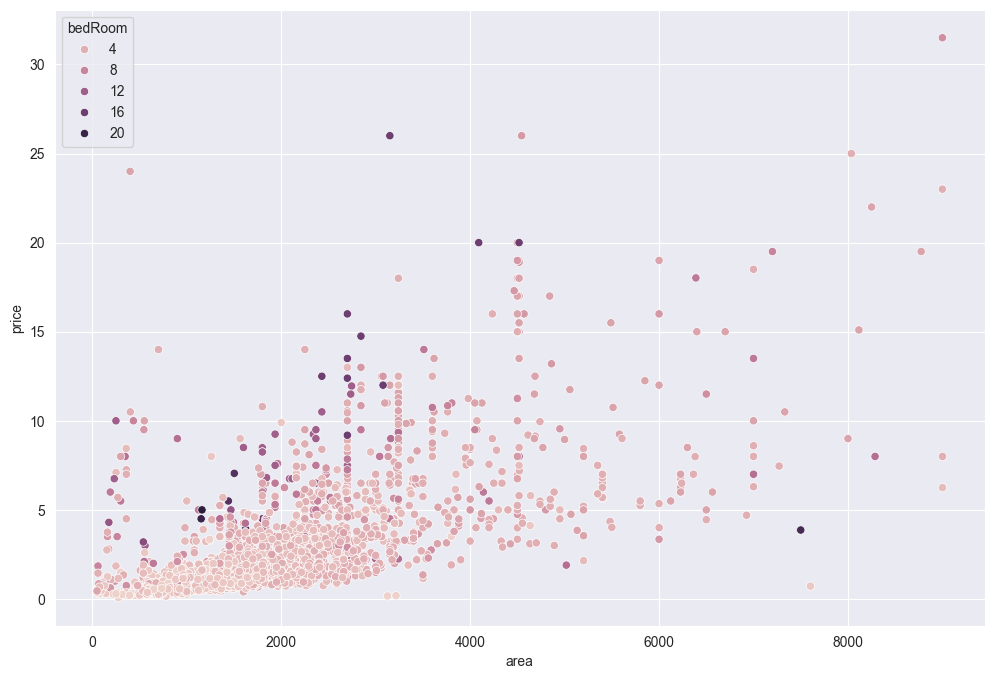

In [88]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[df['area'] < 10000]['area'], y=df['price'], hue=df['bedRoom'])

As area increases price increases

hue with bedroom col also shows high cost for more number of bedroom

<Axes: xlabel='area', ylabel='price'>

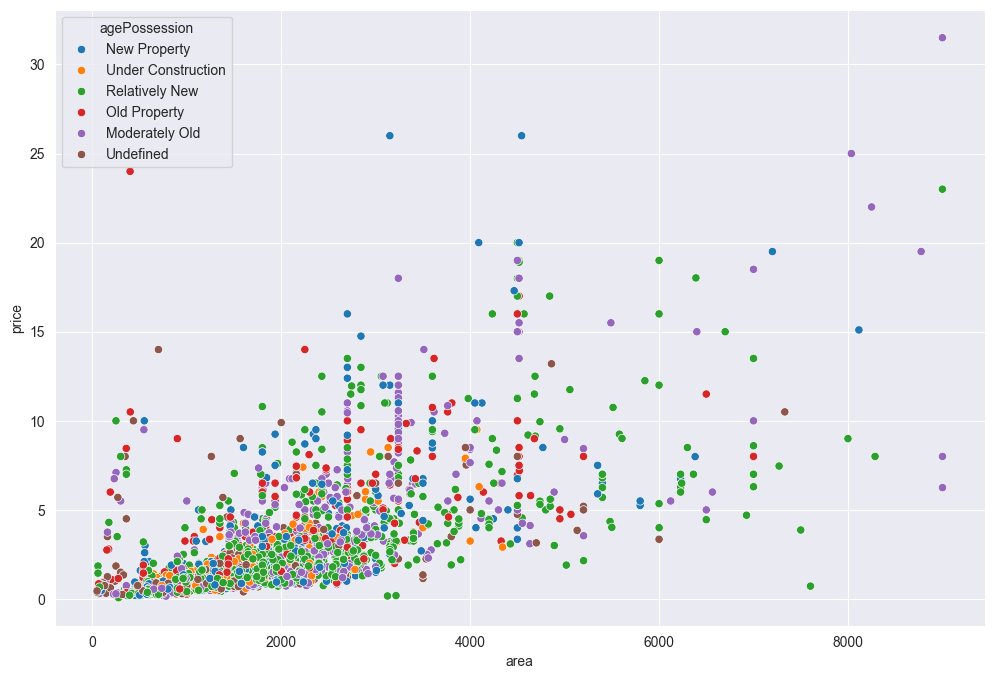

In [89]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[df['area'] < 10000]['area'], y=df['price'], hue=df['agePossession'])

Same graph but with agePossession.

Not much thing to notice here

<Axes: xlabel='area', ylabel='price'>

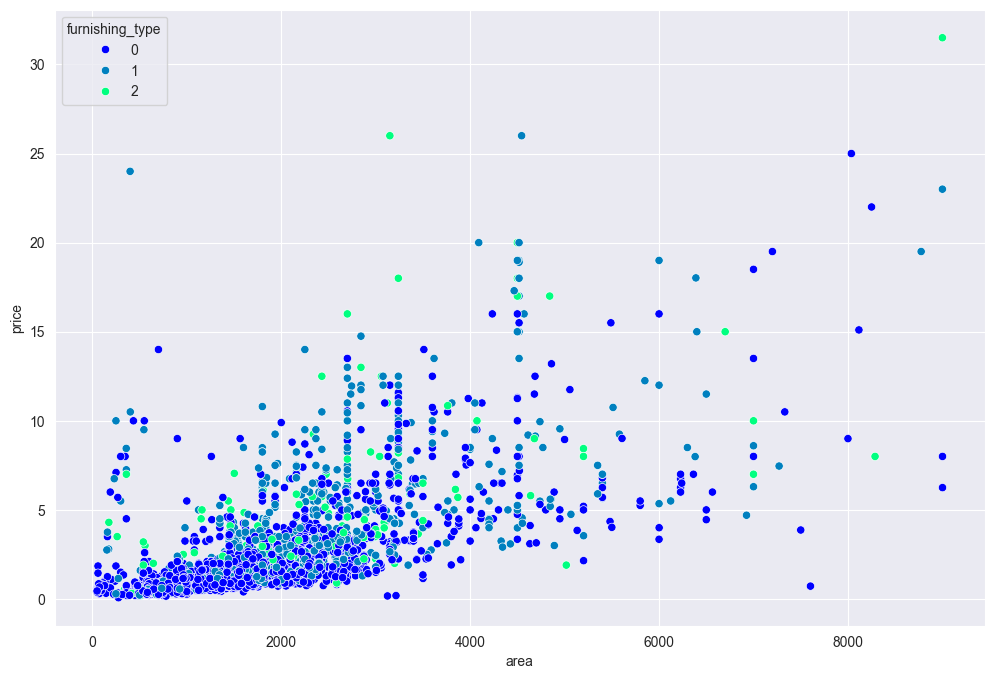

In [109]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[df['area'] < 10000]['area'], y=df['price'], hue=df['furnishing_type'], palette='winter')

0—unfurnished

1—Semi Furnished

2—Furnished

We can see majority of the unfurnished ones are at the bottom

<Axes: xlabel='bedRoom', ylabel='price'>

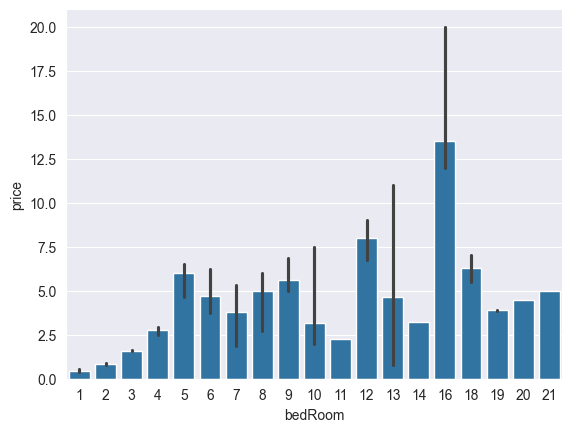

In [90]:
sns.barplot(x=df['bedRoom'], y=df['price'], estimator=np.median)

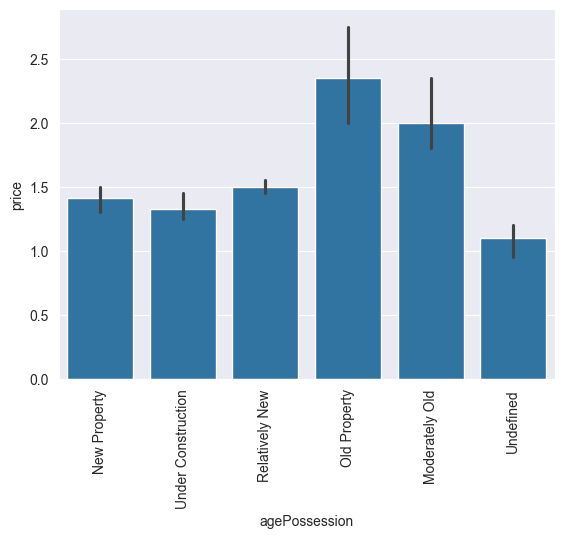

In [91]:
sns.barplot(x=df['agePossession'], y=df['price'], estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

somehow old property is costlier

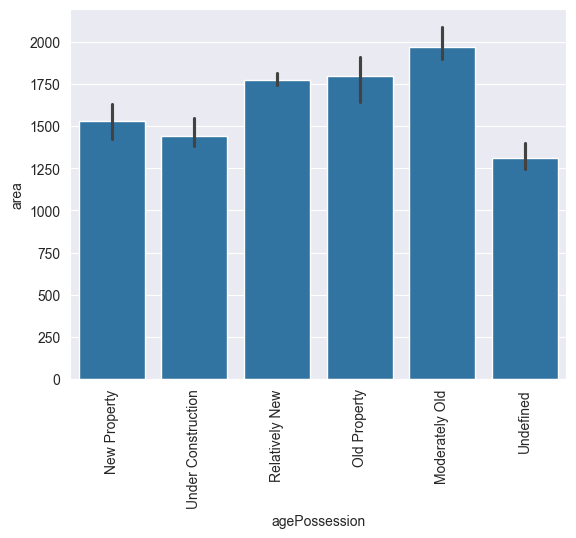

In [92]:
sns.barplot(x=df['agePossession'], y=df['area'], estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='furnishing_type', ylabel='price'>

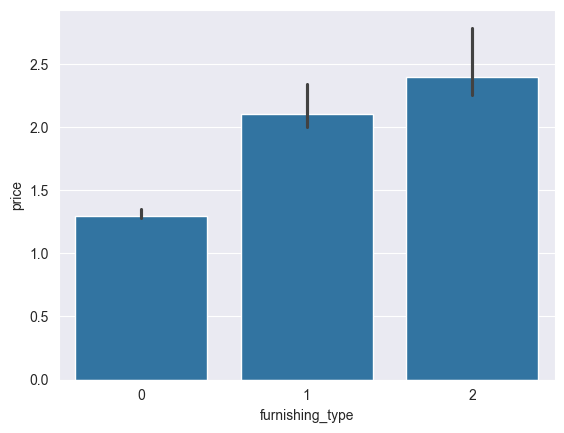

In [93]:
sns.barplot(x=df['furnishing_type'], y=df['price'], estimator=np.median)

<Axes: xlabel='luxury_score', ylabel='price'>

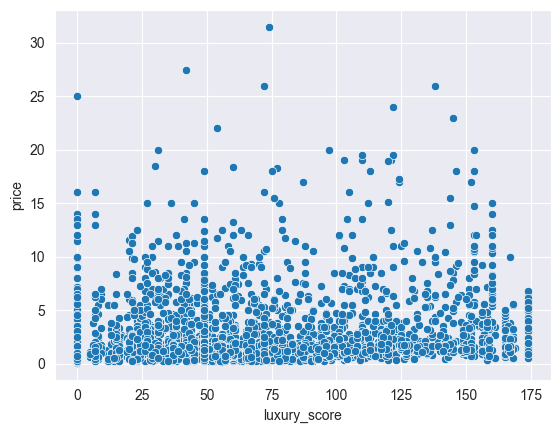

In [94]:
sns.scatterplot(x=df['luxury_score'], y=df['price'])

Unfortunately no pattern

#### Correlation

<Axes: >

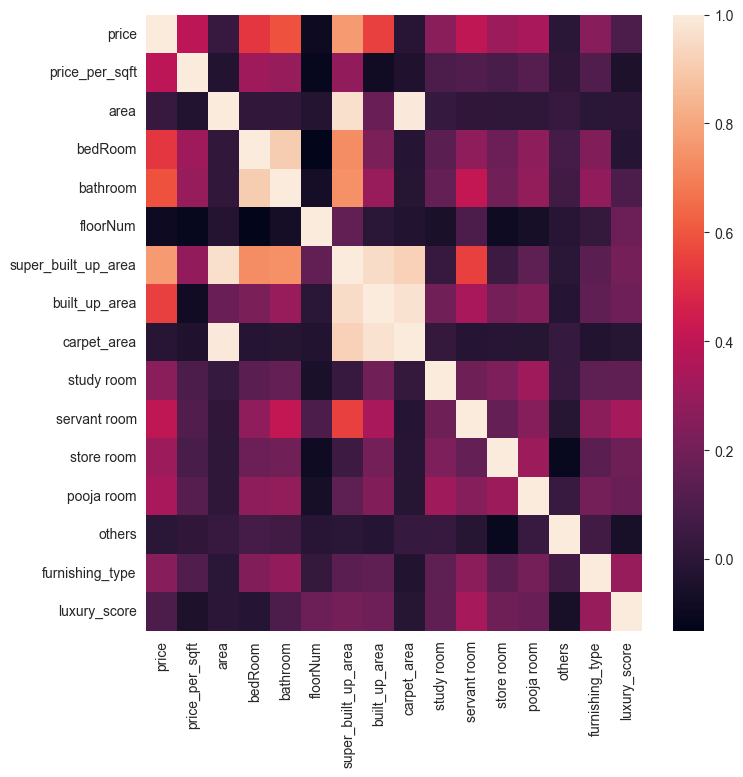

In [96]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True))

In [110]:
print(df.corr(numeric_only=True)['price'].sort_values(ascending=False))

price                  1.000000
super_built_up_area    0.769412
bathroom               0.589826
built_up_area          0.551649
bedRoom                0.522925
servant room           0.400927
price_per_sqft         0.391251
pooja room             0.341492
store room             0.309121
study room             0.258602
furnishing_type        0.254834
luxury_score           0.094775
area                   0.034720
others                -0.003525
carpet_area           -0.011344
floorNum              -0.094290
Name: price, dtype: float64


In [99]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


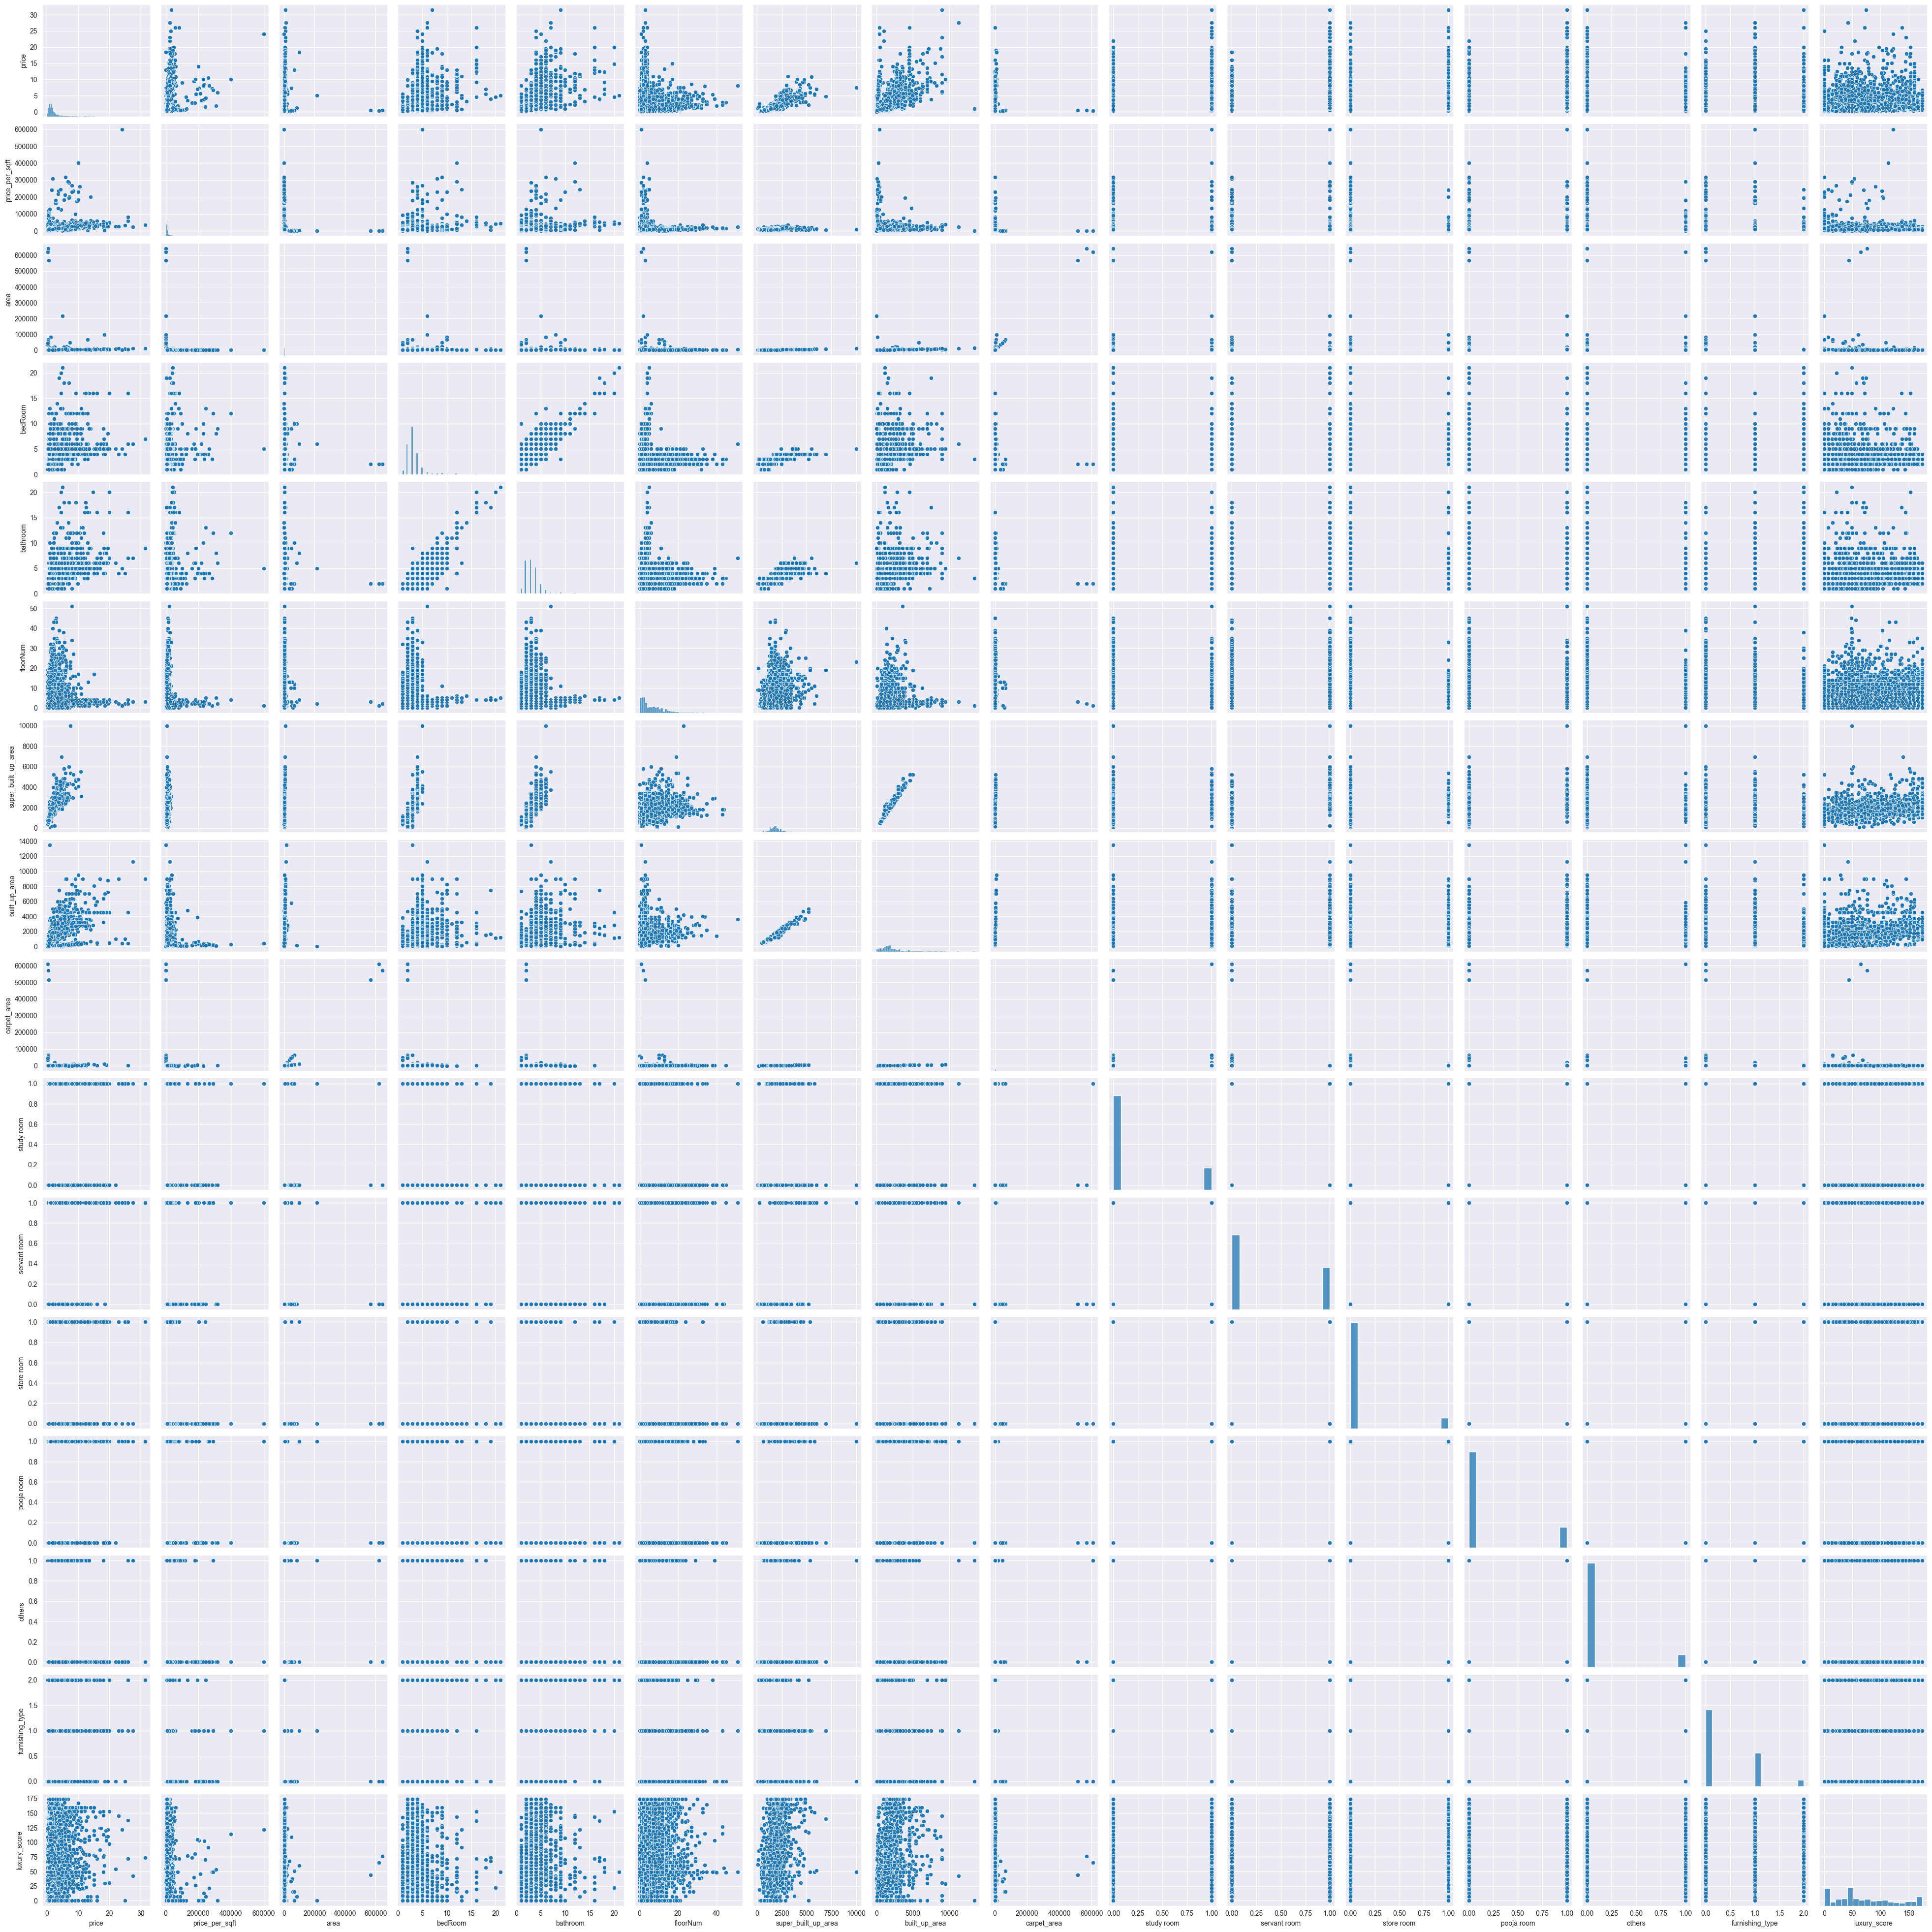

In [100]:
sns.pairplot(df)